In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# download the dataset from:
# "http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
cover_type = fetch_covtype() 

In [3]:
X = cover_type.data
y = cover_type.target
X.shape, y.shape

((581012, 54), (581012,))

### From [previous EDA](https://github.com/adamszabunio/Forest_Cover_Type/tree/master/EDA) and [model fitting](https://github.com/adamszabunio/Forest_Cover_Type/tree/master/Random_Forests), I explore these 54 features in depth. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
clf.feature_importances_

array([  2.46093032e-01,   4.99895814e-02,   3.45833287e-02,
         6.12731964e-02,   5.68807812e-02,   1.17509508e-01,
         4.19424720e-02,   4.43073712e-02,   4.29649244e-02,
         1.09455223e-01,   1.14848158e-02,   7.10438423e-03,
         1.50991728e-02,   2.46822751e-02,   1.05331511e-03,
         6.64374830e-03,   1.78117092e-03,   1.08797926e-02,
         4.52530693e-04,   3.94582860e-03,   4.96549919e-06,
         4.44959759e-05,   2.60343298e-04,   8.47426989e-03,
         2.31208061e-03,   1.00351887e-02,   3.54427536e-03,
         3.07504305e-04,   8.08208314e-07,   7.43770636e-04,
         1.67083308e-03,   2.29054043e-04,   1.04515208e-03,
         1.85777233e-03,   5.96183616e-04,   1.33899617e-02,
         9.13398652e-03,   4.41008498e-03,   8.33755830e-05,
         3.37540828e-04,   5.64787289e-04,   2.10188670e-04,
         6.03798622e-03,   2.87525184e-03,   3.99839755e-03,
         5.75437297e-03,   4.59579143e-03,   6.33454772e-04,
         1.88511072e-03,

In [7]:
# using only 10 trees, we are able to predict with a very high accuracy
clf.score(X_test, y_test)

0.93811217624417165

In [8]:
def srted_index(feature_importances):
    idx_lst = []
    for i, feat in enumerate(feature_importances):
        idx_lst.append([feat, i+1])
    return sorted(idx_lst, reverse=True)

In [9]:
feat_imp = srted_index(clf.feature_importances_)
feat_imp_df = pd.DataFrame(feat_imp, columns=["Feature Importance Score", "Feature"])
feat_imp_df.set_index("Feature", inplace=True)
feat_imp_df.head()

,Feature Importance Score
Feature,
1,0.246093
6,0.117510
10,0.109455
4,0.061273
5,0.056881


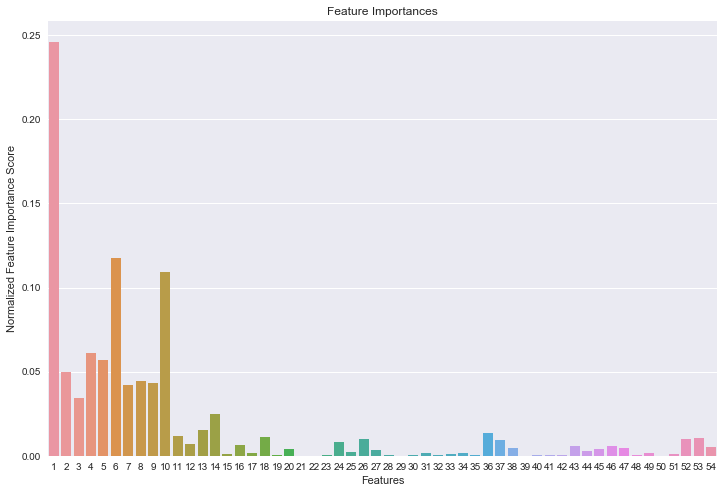

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot([i[1] for i in feat_imp], [i[0] for i in feat_imp])
plt.title("Feature Importances");
plt.xlabel("Features")
plt.ylabel("Normalized Feature Importance Score");
fig.savefig("images/feature_importances")

____